## Setup

In [1]:
! pip install tensorflow_addons
import io
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import sklearn.decomposition

from keras.datasets import mnist
from keras.utils import np_utils
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.8 MB/s 


# Data

In [2]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [5]:
train_data = tf.data.Dataset.zip(tf.data.Dataset.from_tensor_slices(X_train))
train_labels = tf.data.Dataset.zip(tf.data.Dataset.from_tensor_slices(y_train))

test_data = tf.data.Dataset.zip(tf.data.Dataset.from_tensor_slices(X_test))
test_labels = tf.data.Dataset.zip(tf.data.Dataset.from_tensor_slices(y_test))

In [6]:
train_dataset =  tf.data.Dataset.zip((train_data, train_labels)).batch(32)
test_dataset =  tf.data.Dataset.zip((test_data, test_labels)).batch(32)

# Basic Triplet NN

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation=None),
    tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1)) # L2 normalize embeddings
])

In [8]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tfa.losses.TripletSemiHardLoss()
    )

# Train the network
model.fit(
    train_dataset,
    epochs=0
    )

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


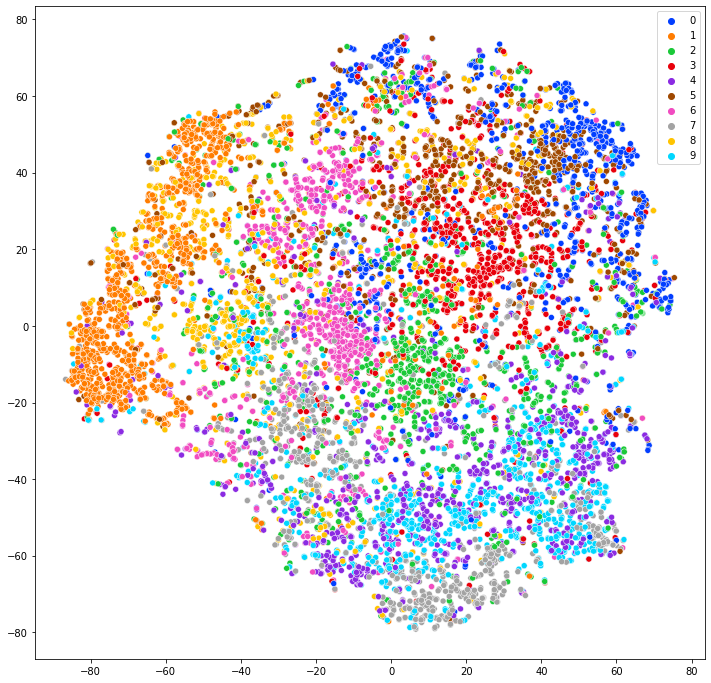

In [9]:
results = model.predict(test_dataset)

tsne = TSNE(n_components=2, random_state=123)
embeddings = tsne.fit_transform(results) 

plt.figure(figsize=(12, 12))
sns.scatterplot(x=embeddings[:,0], y=embeddings[:,1],hue=y_test,palette='bright')

# Advanced Triplet NN

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation=None), # No activation on final dense layer
    tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1)) # L2 normalize embeddings
])

In [14]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tfa.losses.TripletSemiHardLoss()
    )

# Train the network
model.fit(
    train_dataset,
    epochs=25
    )

Epoch 1/25
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3056
Epoch 2/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3031
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3028
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3015
Epoch 5/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3005
Epoch 6/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3018
Epoch 7/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3000
Epoch 8/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2980
Epoch 9/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2979
Epoch 10/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2966
Epoch 11/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2980
Epoch 12/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


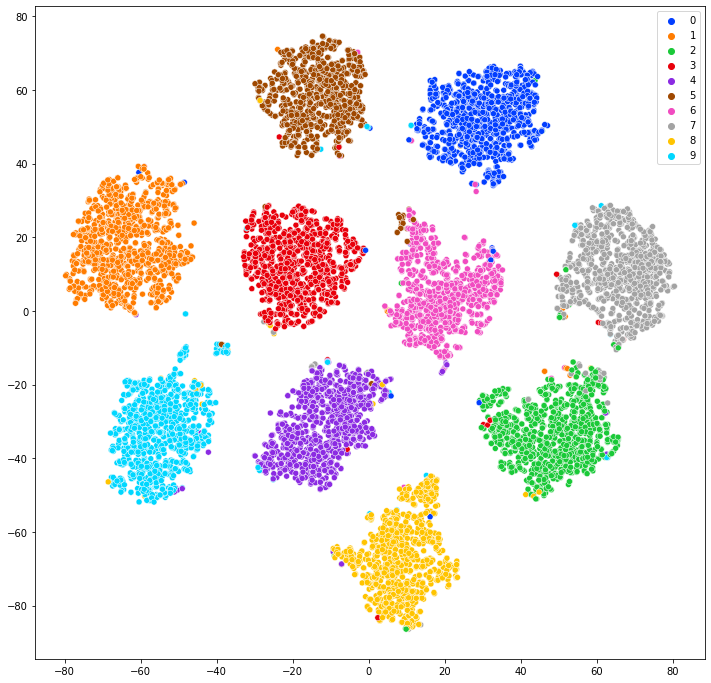

In [15]:
# Evaluate the network
results = model.predict(test_dataset)

tsne = TSNE(n_components=2, random_state=123)
embeddings = tsne.fit_transform(results) 

plt.figure(figsize=(12, 12))
sns.scatterplot(x=embeddings[:,0], y=embeddings[:,1],hue=y_test,palette='bright')